# Notebook 5 - Building ML models for the windfarm dataset

Now let's get cracking. Here we will build different models, just as we have done for the first dataset. We will also try to learn something about the dataset.

In [1]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import SGD, Adam

Using TensorFlow backend.
/home/s/S.Rasp/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
with open('./data/wind_ds.pkl', 'rb') as f:
    X_train, y_train, X_valid, y_valid, X_test = pickle.load(f)

In [3]:
X_train.shape, y_train.shape

((2913, 198), (2913, 32))

In [4]:
def mse(y_true, y_pred, axis=(0,1)): return ((y_true - y_pred)**2).mean(axis)

## Linear regression

### Normalize the dataset

In [5]:
mean, std = X_train.mean(0), X_train.std(0)
X_train = (X_train - mean) / std
X_valid = (X_valid - mean) / std

### Train the model

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
lr.score(X_train, y_train), lr.score(X_valid, y_valid)

(0.6205740640328984, 0.30167931621824096)

In [8]:
mse(y_valid, lr.predict(X_valid))

0.0264250152524463

### Check the prediction against lead time

In [9]:
def plot_mse_lead(y_true, y_pred, label=None):
    plt.plot(np.arange(0, y_true.shape[1]*3, 3), mse(y_true, y_pred, 0), label=label)
    plt.xlabel('Lead time'); plt.ylabel('MSE'); 
    if label is not None: plt.legend()

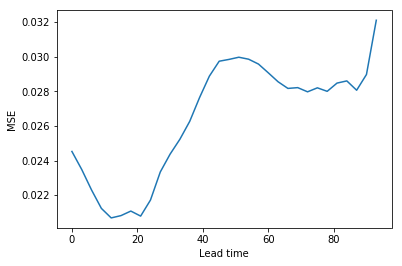

In [10]:
plot_mse_lead(y_valid, lr.predict(X_valid))

## Random forest

In [11]:
rf = RandomForestRegressor(n_estimators=40, n_jobs=-1, min_samples_leaf=10)

In [12]:
%time rf.fit(X_train, y_train)

CPU times: user 31.8 s, sys: 8 ms, total: 31.8 s
Wall time: 1.95 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [19]:
rf.score(X_train, y_train), rf.score(X_valid, y_valid), mse(y_valid, rf.predict(X_valid))

(0.6474916246144096, 0.4658161550359467, 0.02021394551045121)

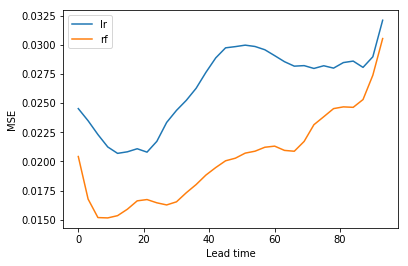

In [14]:
plot_mse_lead(y_valid, lr.predict(X_valid), 'lr')
plot_mse_lead(y_valid, rf.predict(X_valid), 'rf')

**@MARTIN**

Warum ist die Vorhersagequalitaet in den ersten und letzten Stunden so schlecht?

## Neural network

In [47]:
nn = Sequential([
    Dense(256, input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='linear')
])

In [48]:
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               50944     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                8224      
Total params: 59,168
Trainable params: 59,168
Non-trainable params: 0
_________________________________________________________________


In [49]:
nn.compile(Adam(1e-3), 'mse')

In [50]:
nn.fit(X_train, y_train, 1024, epochs=1000, validation_data=(X_valid, y_valid))

Train on 2913 samples, validate on 961 samples
Epoch 1/1000
2913/2913 [==============================] - 0s 108us/step - loss: 2.9396 - val_loss: 0.8321
Epoch 2/1000
2913/2913 [==============================] - 0s 7us/step - loss: 1.9778 - val_loss: 0.5659
Epoch 3/1000
2913/2913 [==============================] - 0s 8us/step - loss: 1.6144 - val_loss: 0.4955
Epoch 4/1000
2913/2913 [==============================] - 0s 8us/step - loss: 1.3929 - val_loss: 0.4116
Epoch 5/1000
2913/2913 [==============================] - 0s 9us/step - loss: 1.1571 - val_loss: 0.3267
Epoch 6/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.9445 - val_loss: 0.2661
Epoch 7/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.8068 - val_loss: 0.2299
Epoch 8/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.7140 - val_loss: 0.2039
Epoch 9/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.6411 - val_loss: 0.1800
Epoch 10/1000
2

2913/2913 [==============================] - 0s 8us/step - loss: 0.0686 - val_loss: 0.0265
Epoch 79/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0683 - val_loss: 0.0265
Epoch 80/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0679 - val_loss: 0.0264
Epoch 81/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0657 - val_loss: 0.0263
Epoch 82/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0650 - val_loss: 0.0263
Epoch 83/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0640 - val_loss: 0.0263
Epoch 84/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0633 - val_loss: 0.0263
Epoch 85/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0621 - val_loss: 0.0262
Epoch 86/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0621 - val_loss: 0.0261
Epoch 87/1000
2913/2913 [==============================] - 0s 8us/ste

2913/2913 [==============================] - 0s 8us/step - loss: 0.0340 - val_loss: 0.0248
Epoch 156/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0344 - val_loss: 0.0247
Epoch 157/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0340 - val_loss: 0.0248
Epoch 158/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0337 - val_loss: 0.0247
Epoch 159/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0337 - val_loss: 0.0246
Epoch 160/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0332 - val_loss: 0.0246
Epoch 161/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0331 - val_loss: 0.0247
Epoch 162/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0328 - val_loss: 0.0247
Epoch 163/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0327 - val_loss: 0.0247
Epoch 164/1000
2913/2913 [==============================] - 0

2913/2913 [==============================] - 0s 8us/step - loss: 0.0261 - val_loss: 0.0245
Epoch 233/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0259 - val_loss: 0.0245
Epoch 234/1000
2913/2913 [==============================] - 0s 10us/step - loss: 0.0257 - val_loss: 0.0245
Epoch 235/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0255 - val_loss: 0.0245
Epoch 236/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0257 - val_loss: 0.0245
Epoch 237/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0256 - val_loss: 0.0245
Epoch 238/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0256 - val_loss: 0.0246
Epoch 239/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0255 - val_loss: 0.0246
Epoch 240/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0253 - val_loss: 0.0246
Epoch 241/1000
2913/2913 [==============================] - 

2913/2913 [==============================] - 0s 10us/step - loss: 0.0229 - val_loss: 0.0246
Epoch 310/1000
2913/2913 [==============================] - 0s 10us/step - loss: 0.0232 - val_loss: 0.0246
Epoch 311/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0230 - val_loss: 0.0245
Epoch 312/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0229 - val_loss: 0.0245
Epoch 313/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0230 - val_loss: 0.0245
Epoch 314/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0229 - val_loss: 0.0246
Epoch 315/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0228 - val_loss: 0.0246
Epoch 316/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0230 - val_loss: 0.0246
Epoch 317/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0230 - val_loss: 0.0246
Epoch 318/1000
2913/2913 [==============================] -

2913/2913 [==============================] - 0s 6us/step - loss: 0.0218 - val_loss: 0.0246
Epoch 387/1000
2913/2913 [==============================] - 0s 6us/step - loss: 0.0220 - val_loss: 0.0246
Epoch 388/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0220 - val_loss: 0.0246
Epoch 389/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0217 - val_loss: 0.0246
Epoch 390/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0218 - val_loss: 0.0246
Epoch 391/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0219 - val_loss: 0.0247
Epoch 392/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0220 - val_loss: 0.0246
Epoch 393/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0218 - val_loss: 0.0246
Epoch 394/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0217 - val_loss: 0.0246
Epoch 395/1000
2913/2913 [==============================] - 0

2913/2913 [==============================] - 0s 10us/step - loss: 0.0214 - val_loss: 0.0246
Epoch 464/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0213 - val_loss: 0.0247
Epoch 465/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0213 - val_loss: 0.0246
Epoch 466/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0215 - val_loss: 0.0246
Epoch 467/1000
2913/2913 [==============================] - 0s 10us/step - loss: 0.0214 - val_loss: 0.0246
Epoch 468/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0213 - val_loss: 0.0246
Epoch 469/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0214 - val_loss: 0.0247
Epoch 470/1000
2913/2913 [==============================] - 0s 10us/step - loss: 0.0214 - val_loss: 0.0248
Epoch 471/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0213 - val_loss: 0.0248
Epoch 472/1000
2913/2913 [==============================] 

2913/2913 [==============================] - 0s 7us/step - loss: 0.0210 - val_loss: 0.0245
Epoch 541/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0212 - val_loss: 0.0246
Epoch 542/1000
2913/2913 [==============================] - 0s 10us/step - loss: 0.0211 - val_loss: 0.0247
Epoch 543/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0210 - val_loss: 0.0247
Epoch 544/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0212 - val_loss: 0.0247
Epoch 545/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0212 - val_loss: 0.0246
Epoch 546/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0213 - val_loss: 0.0246
Epoch 547/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0210 - val_loss: 0.0247
Epoch 548/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0211 - val_loss: 0.0247
Epoch 549/1000
2913/2913 [==============================] - 

2913/2913 [==============================] - 0s 8us/step - loss: 0.0210 - val_loss: 0.0247
Epoch 618/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0209 - val_loss: 0.0247
Epoch 619/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0209 - val_loss: 0.0247
Epoch 620/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0208 - val_loss: 0.0247
Epoch 621/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0209 - val_loss: 0.0247
Epoch 622/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0210 - val_loss: 0.0248
Epoch 623/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0210 - val_loss: 0.0248
Epoch 624/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0211 - val_loss: 0.0248
Epoch 625/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0210 - val_loss: 0.0247
Epoch 626/1000
2913/2913 [==============================] - 0

2913/2913 [==============================] - 0s 9us/step - loss: 0.0209 - val_loss: 0.0249
Epoch 695/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0211 - val_loss: 0.0247
Epoch 696/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0208 - val_loss: 0.0246
Epoch 697/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0208 - val_loss: 0.0249
Epoch 698/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0209 - val_loss: 0.0251
Epoch 699/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0209 - val_loss: 0.0250
Epoch 700/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0210 - val_loss: 0.0247
Epoch 701/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0208 - val_loss: 0.0247
Epoch 702/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0209 - val_loss: 0.0248
Epoch 703/1000
2913/2913 [==============================] - 0

2913/2913 [==============================] - 0s 10us/step - loss: 0.0207 - val_loss: 0.0250
Epoch 772/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0208 - val_loss: 0.0249
Epoch 773/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0208 - val_loss: 0.0251
Epoch 774/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0207 - val_loss: 0.0251
Epoch 775/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0208 - val_loss: 0.0250
Epoch 776/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0209 - val_loss: 0.0249
Epoch 777/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0208 - val_loss: 0.0250
Epoch 778/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0207 - val_loss: 0.0250
Epoch 779/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0208 - val_loss: 0.0249
Epoch 780/1000
2913/2913 [==============================] - 

2913/2913 [==============================] - 0s 9us/step - loss: 0.0208 - val_loss: 0.0248
Epoch 849/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0207 - val_loss: 0.0249
Epoch 850/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0208 - val_loss: 0.0250
Epoch 851/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0208 - val_loss: 0.0250
Epoch 852/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0207 - val_loss: 0.0249
Epoch 853/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0208 - val_loss: 0.0248
Epoch 854/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0207 - val_loss: 0.0249
Epoch 855/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0208 - val_loss: 0.0251
Epoch 856/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0207 - val_loss: 0.0251
Epoch 857/1000
2913/2913 [==============================] - 0

2913/2913 [==============================] - 0s 7us/step - loss: 0.0207 - val_loss: 0.0251
Epoch 926/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0206 - val_loss: 0.0252
Epoch 927/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0207 - val_loss: 0.0251
Epoch 928/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0207 - val_loss: 0.0250
Epoch 929/1000
2913/2913 [==============================] - 0s 7us/step - loss: 0.0207 - val_loss: 0.0251
Epoch 930/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0208 - val_loss: 0.0250
Epoch 931/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0206 - val_loss: 0.0252
Epoch 932/1000
2913/2913 [==============================] - 0s 8us/step - loss: 0.0207 - val_loss: 0.0254
Epoch 933/1000
2913/2913 [==============================] - 0s 9us/step - loss: 0.0208 - val_loss: 0.0251
Epoch 934/1000
2913/2913 [==============================] - 0

**@MARTIN**

Ich kann mit einem NN im ersten Versuch keine besseren Ergebnisse erzielen wie mit dem RF. Die Datenmenge ist natuerlich auch richtig klein. Hast du Tipps?

In [51]:
356*24//3

2848